In [11]:
import matplotlib.pyplot as plt
from sbi.inference import SNPE
from sbi.neural_nets.net_builders.flow import build_nsf
from sbi import utils as utils
from data_process import *
import pickle

In [ ]:
with open('posterior_nsf_abs.pickle', 'rb') as f:
    posterior = pickle.load(f)

In [13]:
with open('MatingPool_final_sorted.pickle','rb') as f:
    MatingPool = pickle.load(f)
params = MatingPool[0]
index_min = MatingPool[1].index(min(MatingPool[1]))
print(np.mean(MatingPool[1]))
print(min(MatingPool[1]))
# print(MatingPool[0][5])
index_min = 9
theta_true = torch.Tensor(np.array(MatingPool[0][index_min]))
params_array = np.array(MatingPool[0])
params_mean = np.mean(params_array, axis=0)
theta_mean = torch.Tensor(params_mean)
print(theta_true)
print(theta_mean)

307.61710866216026
6.623898029327393
tensor([7.9636e-04, 3.8157e-04, 1.7182e-04, 1.3678e-04, 6.9368e-03, 5.6089e-05,
        1.5493e-05, 2.4741e-03, 3.6744e-05, 3.7073e-03, 7.1491e-03, 2.5491e-02,
        7.7435e-05, 5.5144e-06, 6.6898e-03, 4.8673e-03, 4.0643e-03, 2.1715e-03,
        1.5691e-03, 2.7372e-02, 4.5736e-05, 9.4121e-06, 5.1254e-04, 1.6635e-03,
        1.5481e-03, 4.1648e-01, 5.4735e-01, 6.7420e+00, 2.0043e-01, 5.6069e+00,
        3.7660e+00])
tensor([1.2864e-03, 5.7880e-04, 1.3697e-04, 7.8213e-04, 8.7355e-03, 4.4582e-05,
        1.2940e-05, 2.6586e-03, 4.1399e-05, 4.1202e-03, 4.5342e-03, 1.9060e-02,
        5.8005e-05, 8.6731e-06, 3.2316e-03, 2.4445e-03, 2.6912e-03, 2.9085e-03,
        4.1667e-03, 1.6219e-02, 6.7837e-05, 9.1376e-06, 1.1036e-03, 2.6142e-03,
        2.3567e-03, 4.9869e-01, 6.4734e-01, 6.5231e+00, 2.7704e-01, 5.6736e+00,
        3.2907e+00])


In [14]:
with open('abs_enbo.pickle', 'rb') as f:
    Data = pickle.load(f)
params = Data[0]
n_dim = 31 #
print(len(params[0][0]))
print(n_dim)
metrics = Data[1]
x = []
for p in params:
    x+=p
x_train = torch.tensor(x ,dtype=torch.float32)
y_train = torch.tensor([item[1:] for item in metrics],dtype=torch.float32)
print(y_train.size())
assert x_train.shape[0] == y_train.shape[0]
print(x_train[0])
print(y_train[0])
x_train = x_train[:300120]
y_train = y_train[:300120]
print(len(x_train))
print(len(y_train))

31
31
torch.Size([150120, 24])
tensor([1.3000e-03, 4.0000e-04, 2.1000e-04, 3.0100e-03, 5.0100e-03, 2.0000e-05,
        1.4100e-05, 7.0100e-03, 6.0100e-05, 3.0100e-03, 3.0000e-03, 0.0000e+00,
        3.0000e-05, 1.8000e-05, 1.0000e-03, 3.1000e-03, 1.0000e-04, 7.5100e-03,
        0.0000e+00, 2.0000e-02, 8.0000e-05, 1.8000e-05, 4.0000e-03, 4.6000e-03,
        2.6000e-03, 7.0000e-01, 1.3000e+00, 5.0000e+00, 9.0000e-01, 2.0000e+00,
        2.8000e+00])
tensor([ 69.5652, 644.3761,   0.0000, -62.7126,  50.0000, -66.5721,  85.1064,
        107.2386,   0.0000,   0.0000,   0.0000,   0.0000, -61.7765,   0.0000,
          6.4506, 387.7250,  26.0000,   0.0000, 262.7890, -65.4641, 387.7250,
        387.7250,   1.0360,  13.8750])
150120
150120


In [15]:
params_range = [
                # Soma
				[0.0005, 0.002],  # 0 CaN_s
				[0.0001, 0.001],  # 1 CaL_s
				[1e-5, 0.0005],  # 2 Ih
				[1e-5, 0.01],  # 3 KDR
				[1e-5, 0.03],  # 4 Kv31
				[1e-5, 1e-4],  # 5 sKCa
				[1e-7, 2e-5],  # 6 NaL
				[1e-5, 0.01],  # 7 Na
				[1e-7, 100e-6],  # 8 gpas
				# scaling factor for dend CaT, KDR, Kv31, sKCa, NaL, Na, CaN, CaL
				[1e-5, 0.015], [0, 0.01], [0, 0.03], [0, 1e-4], [0, 2e-5], [0, 0.01],
				[0.0001, 0.005], [0.0001, 0.005],  # 9, 10, 11, 12, 13, 14, 15, 16
				[1e-5, 0.015], [0, 0.01], [0, 0.03], [0, 1e-4], [0, 2e-5], [0, 0.01],
				[0.0001, 0.005], [0.0001, 0.005], # 17, 18, 19, 20, 21, 22, 23, 24
				[0.1, 1],  # 25 r_kdr could potentially be even slower, but unlikely to be authentic
				[0.3, 2],  # 26 r_na
				[1, 10],  # 27 r_kv31 could potentially be even quicker
				[0.1, 1],  # 28 r_cat
				[1, 8],  # 29 r_cacum soma
				[0.8, 5],  # 30 r_cacum dend
			]
	
# params_names = ['CaT', 'Ih', 'KDR', 'Kv3.1', 'skCa', 'NaL', 'Na', 'gpas']
params_names = [
        "s_can", "s_cal", "s_ih", "s_kdr", "s_kv31", "s_skca", "s_nal", "s_na", "gpas",
        "dp_cat", "dp_kdr", "dp_kv31", "dp_skca", "dp_nal", "dp_na", "dp_can", "dp_cal",
        "dd_cat", "dd_kdr", "dd_kv31", "dd_skca", "dd_nal", "dd_na", "dd_can", "dd_cal",
        "r_kdr", "r_na", "r_kv31", "r_cat", "r_cacum_s", "r_cacum_d"
        ]
normalized_range = [[0,1] for i in range(len(params_range))]

In [16]:
parameter_normalizer = ParameterNormalizer(params_range)
normalized_x_train = parameter_normalizer.normalize(x_train)
normalized_theta_true = parameter_normalizer.normalize(theta_true.unsqueeze(0))
normalized_theta_mean = parameter_normalizer.normalize(theta_mean.unsqueeze(0))

In [17]:
normalized_x_train = normalized_x_train.to('cpu')
kde_dist = KDEDistribution(normalized_x_train, bandwidth=0.1)
prior = kde_dist
prior = prior.to('cpu')
proposal = prior

In [10]:
inference = SNPE(prior, density_estimator="nsf", device="cpu")

In [9]:
density_estimator = inference.append_simulations(normalized_x_train, y_train, proposal=prior, exclude_invalid_x=True).train()  #force_first_round_loss=True
posterior = inference.build_posterior(density_estimator)  #sample_with="mcmc"

 Neural network successfully converged after 333 epochs.

Drawing 30000 posterior samples: 100%|██████████| 30000/30000 [00:00<00:00, 50114.93it/s]


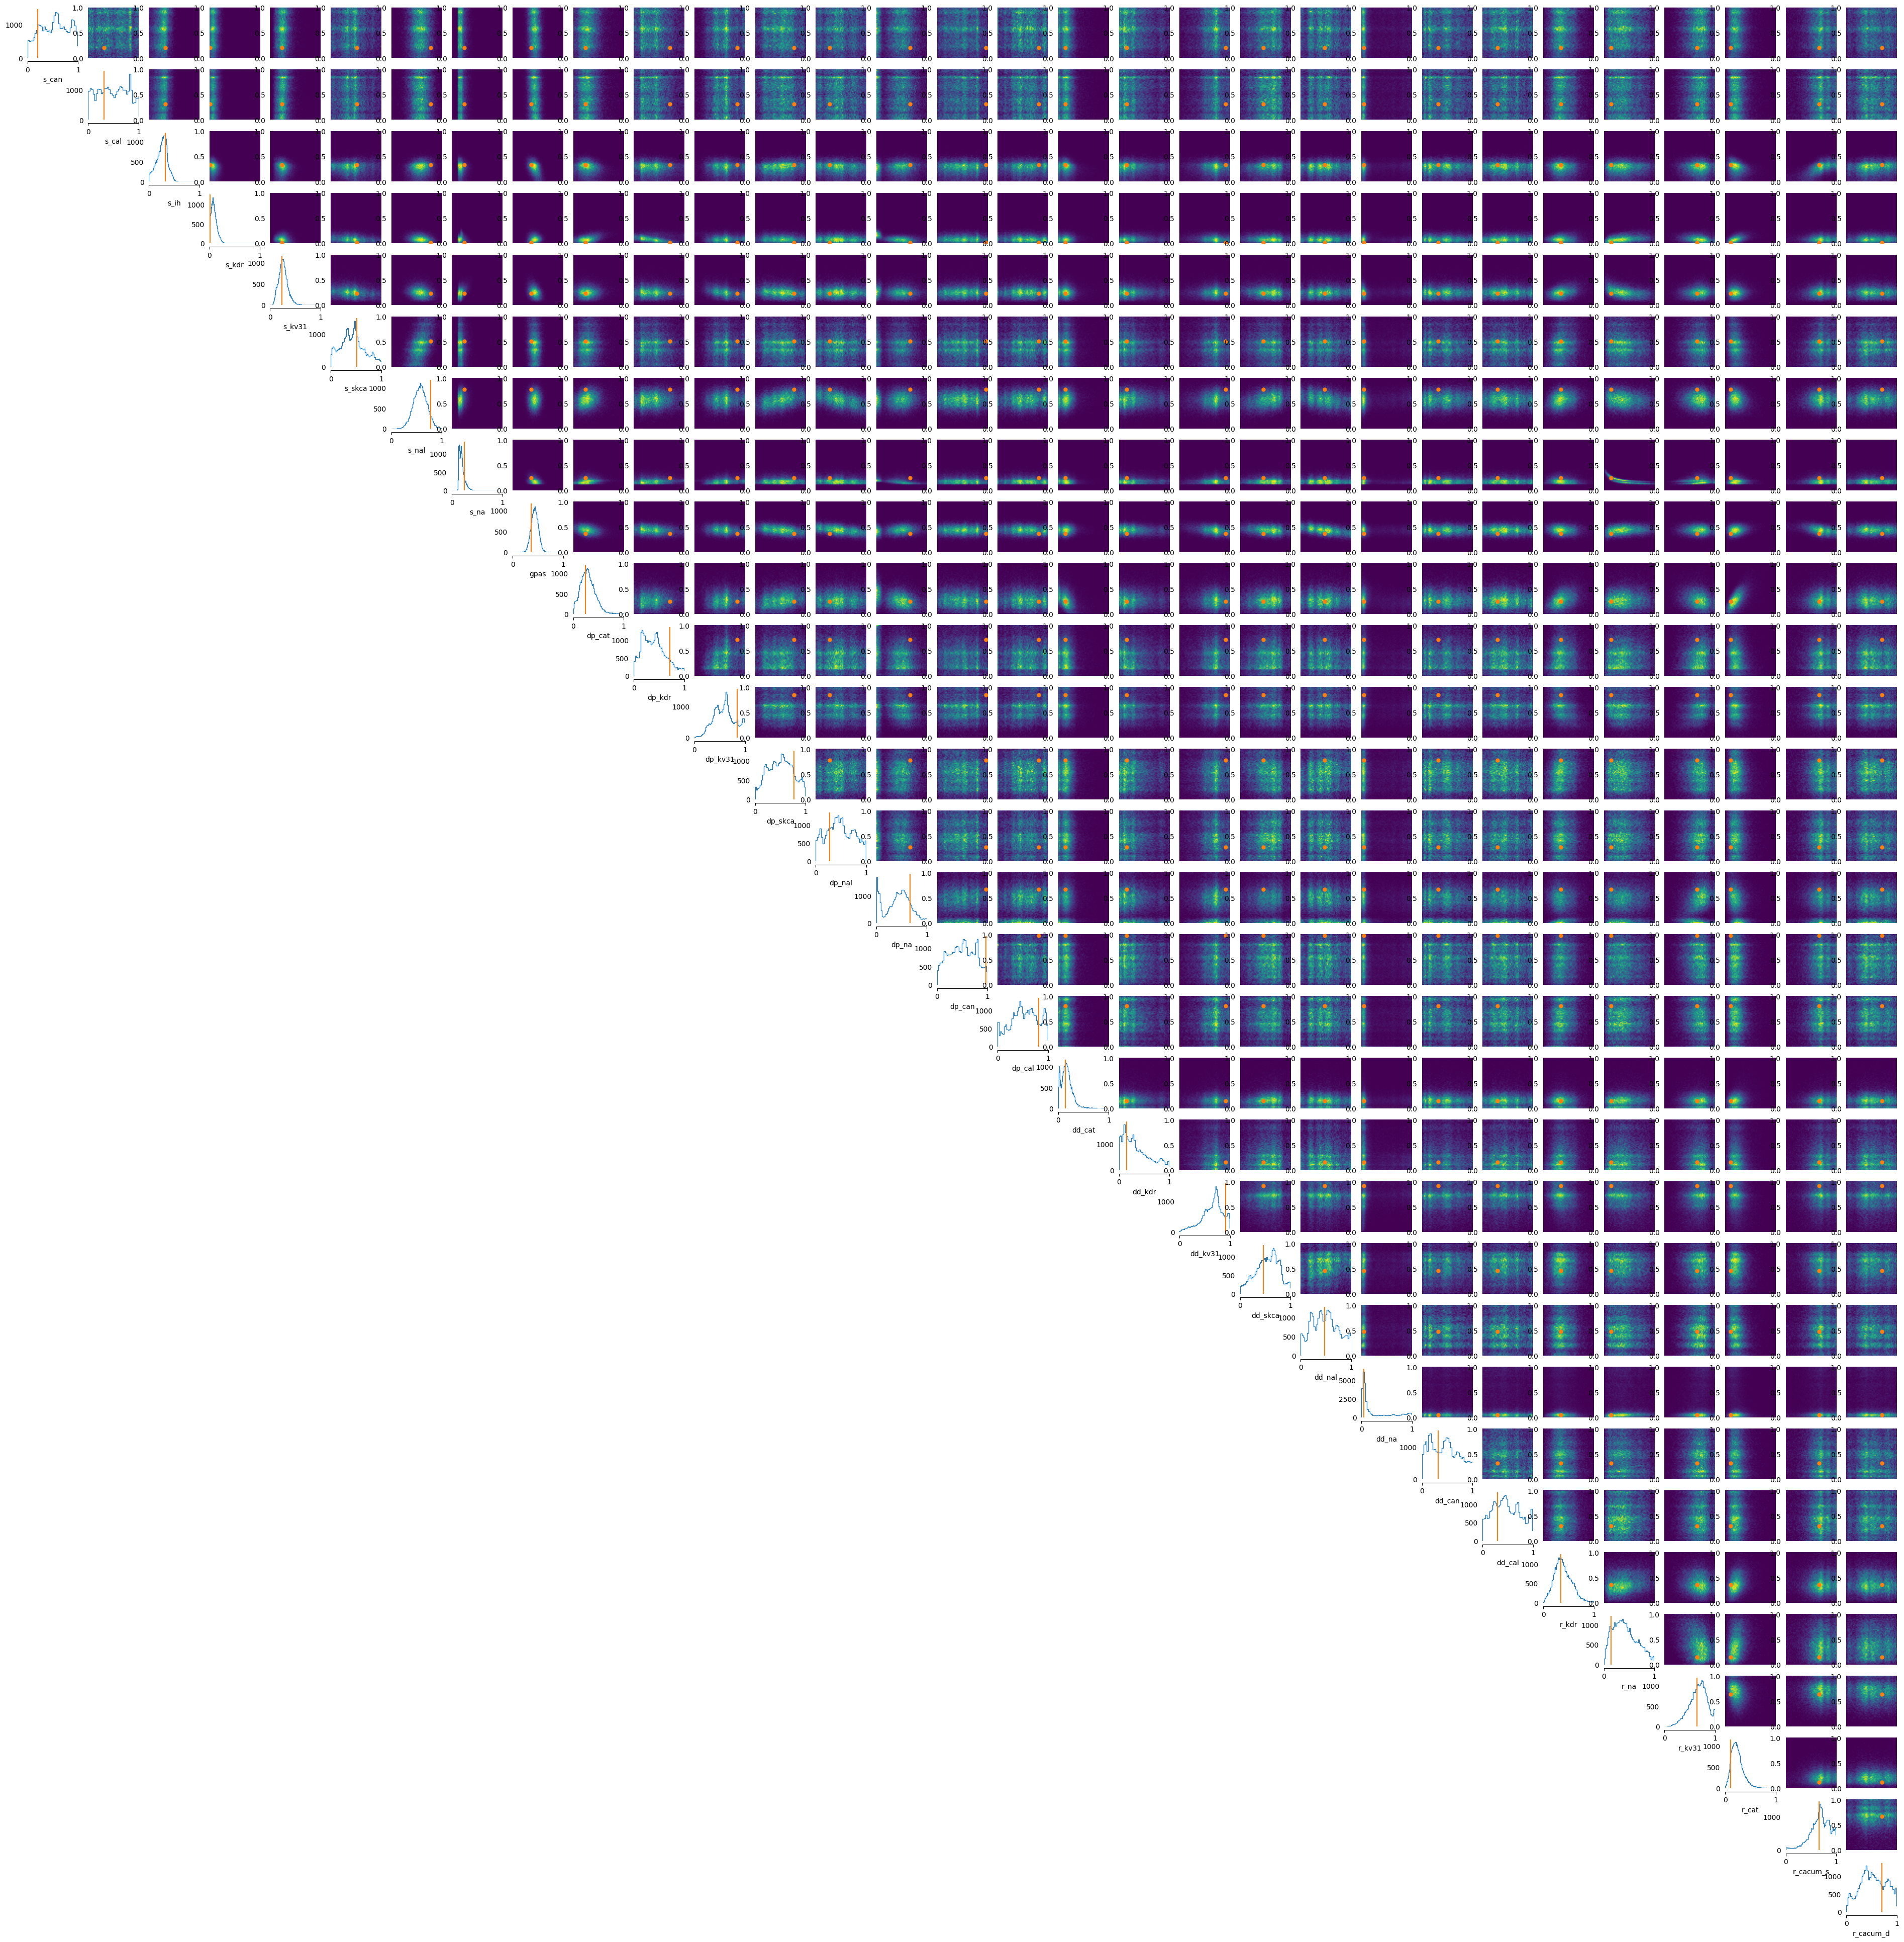

In [19]:
x_o_names = '[freq_sp_37, p_prc, score_shw, v_AHP, score_AHP, v_MHP, v_AM, freq_fi3, freq_fi1, freq_fi2, freq_fi5, v_HP, e_slp, v_half_hp, burst_hp, score_bp, burst_time, burst_count, check_spikes_after, z_value, v_rest, max_interval, min_interval, max_int, min_int]'
x_o = torch.tensor([13, 250, 0, -61, 0, -61, 0, 36, 70, 121, 175, -80, 5, -77, 0, 0, 60, 5, 1, 300, -60, 1.4, 2.5, 1.5, 5]) #, 0.04, 0.06, 0.04], device='cpu') # original
# x_o = torch.tensor([6, 250, 0, -61, 0, -61, 0, 22, 56, 114, 168, -80, 5, -77, 0, 0, 60, 5, 1, 300, -60, 1.4, 2.5, 1.5, 5]) #, 0.04, 0.06, 0.04], device='cpu') #lower
# x_o = torch.tensor([28, 250, 0, -61, 0, -61, 0, 50, 84, 130, 180, -80, 5, -77, 0, 0, 60, 5, 1, 300, -60, 1.4, 2.5, 1.5, 5]) #, 0.04, 0.06, 0.04], device='cpu') #higher
# x_o = torch.tensor([13, 250, 0, -70, 0, -63, 0, 36, 70, 121, 175, -80, 5, -77, 0, 0, 60, 5, 1, 300, -60, 1.4, 2.5, 1.5, 5]) #, 0.04, 0.06, 0.04], device='cpu') # AHP

from sbi import analysis as analysis
samples = posterior.sample((30000,), x=x_o).to('cpu')
fig, axes = analysis.pairplot(
    samples,
    points=normalized_theta_true,
    labels=params_names,
	limits=normalized_range,
	figsize=(48, 48),
)

for i in range(len(params_names)):
    for j in range(len(params_names)):
        axes[i, j].tick_params(labelleft=True)


In [21]:
samples = torch.clamp(samples, min=1e-10, max=1)
denormalized_samples = parameter_normalizer.denormalize(samples)
denormalized_samples = denormalized_samples.tolist()

In [ ]:
with open('NSF_abs.pickle', 'wb') as f:
    pickle.dump([denormalized_samples, [100]*len(denormalized_samples)], f)

In [ ]:
# posterior = posterior.set_default_x(x_o)
# with open('posterior_nsf_abs.pickle', 'wb') as f:
#     pickle.dump(posterior, f)

In [ ]:
with open('posterior_nsf_abs.pickle', 'rb') as f:
    posterior = pickle.load(f)